In [2]:
class Product():
    def __init__(self,name,weight,value):
        self.name = name
        self.weight = weight
        self.value = value


In [7]:
from random import random

class Individual():
    def __init__(self,weights,values,weight_limit,generation = 0):
        self.weights = weights
        self.values = values
        self.weight_limit = weight_limit
        self.generation = generation
        self.fitness = 0
        self.chromosome = []
        self.weight_sum = 0
        
        for i in range(len(weights)):
            if random() < 0.5:
                self.chromosome.append(0)
            else:
                self.chromosome.append(1)

    def rating(self):
        fitness = 0
        weight_sum = 0
        for i in range(len(self.chromosome)):
            if(self.chromosome[i] == 1):
                fitness += self.values[i]
                weight_sum += self.weights[i]
        if weight_sum > self.weight_limit:
            fitness = 1
        self.fitness = fitness
        self.weight_sum = weight_sum
    
    def crossover(self, other_individual):
        chromosome_split_mark = round(random() * len(self.chromosome))
        
        child1 = other_individual.chromosome[0:chromosome_split_mark] + self.chromosome[chromosome_split_mark::]
        child2 = self.chromosome[0:chromosome_split_mark] + other_individual.chromosome[chromosome_split_mark::]
        
        children = [Individual(self.weights,self.values,self.weight_limit,self.generation + 1),
                  Individual(self.weights,self.values,self.weight_limit,self.generation + 1)]
        children[0].chromosome = child1
        children[1].chromosome = child2
        
        return children
    
    def mutation(self,mutation_rate):
        for i in range(len(self.chromosome)):
            if random() < mutation_rate:
                if self.chromosome[i] == 1:
                    self.chromosome[i] = 0
                else:
                    self.chromosome[i] = 1
        return self

In [4]:
class AG():
    def __init__(self,population_size):
        self.population_size = population_size
        self.population = []
        self.generation = 0
        self.best_solution = 0
        self.solution_list = []
    
    def initialize_population(self,weights,values,weight_limit):
        for i in range(self.population_size):
            self.population.append(Individual(weights,values,weight_limit))
        self.best_solution = self.population[0]
        
        for individual in self.population:
            individual.rating()
        
    def order_population(self):
        self.population = sorted(self.population, 
                                key = lambda population: population.fitness, 
                                reverse=True)
    
    def best_individual(self,individual):
        if individual.fitness > self.best_solution.fitness:
            self.best_solution = individual
            
    def fitness_sum(self):
        fitness = 0
        for individual in self.population:
            fitness += individual.fitness
        return fitness
    
    def elitism(self, fitness_sum):
        individual = -1
        elite = random() * fitness_sum
        fitness = 0
        breakpoint = 0
        
        while breakpoint < len(self.population) and fitness < elite:
            fitness+= self.population[breakpoint].fitness
            individual+= 1
            breakpoint += 1
        return individual
    
    def print_generation(self):
        best_individual = self.population[0]
        print("Geração: %s -> Valor: %s -> Espaço: %s -> Cromossomo: %s" % (
        self.population[0].generation,
        best_individual.fitness,
        best_individual.weight_sum,
        best_individual.chromosome))
        
    def solve(self, mutation_rate,number_of_generations,weights,values,weight_limit):
        self.initialize_population(weights,values,weight_limit)
        
        self.order_population()
        self.best_solution = self.population[0]
        self.solution_list.append(self.best_solution.fitness)
        self.print_generation()
        for _ in range(number_of_generations):
            fitness_sum = self.fitness_sum()
            new_population = []
            for __ in range(0, self.population_size, 2):
                father1 = self.elitism(fitness_sum)
                father2 = self.elitism(fitness_sum)
                
                children = self.population[father1].crossover(self.population[father2])
                new_population.append(children[0].mutation(mutation_rate))
                new_population.append(children[1].mutation(mutation_rate))
            
            self.population = list(new_population)
            
            for individual in self.population:
                individual.rating()
                
            self.order_population()
            
            self.print_generation()
            
            best_individual = self.population[0]
            self.solution_list.append(best_individual.fitness)

            self.best_individual(best_individual)
            
        print("\nMelhor Solução -> Geração: %s \nValor: %s \nEspaço: %s \nCromossomo: %s" % (
            self.best_solution.generation,
            self.best_solution.fitness,
            self.best_solution.weight_sum,
            self.best_solution.chromosome))
            
        return self.best_solution.chromosome 

Geração: 0 -> Valor: 19410.52 -> Espaço: 2.2695899 -> Cromossomo: [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
Geração: 1 -> Valor: 20257.62 -> Espaço: 1.9150899 -> Cromossomo: [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Geração: 2 -> Valor: 21415.280000000002 -> Espaço: 2.5924899000000003 -> Cromossomo: [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
Geração: 3 -> Valor: 21415.280000000002 -> Espaço: 2.5924899000000003 -> Cromossomo: [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
Geração: 4 -> Valor: 23606.520000000004 -> Espaço: 2.5535899000000004 -> Cromossomo: [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
Geração: 5 -> Valor: 24036.420000000006 -> Espaço: 2.6079898999999997 -> Cromossomo: [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
Geração: 6 -> Valor: 23606.520000000004 -> Espaço: 2.5535899000000004 -> Cromossomo: [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
Geração: 7 -> Valor: 23606.520000000004 -> Espaço: 2.5535899000000004 -> Cromossomo: [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
Geração: 8 -> 

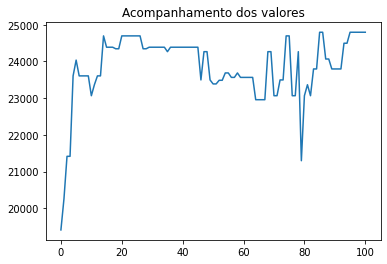

In [9]:
import matplotlib.pyplot as pl        
if __name__ == "__main__":
    lista_produtos = []
    lista_produtos.append(Product("Geladeira Dako",0.751,999.90))
    lista_produtos.append(Product("IPhone 6",0.0000899,2911.12))
    lista_produtos.append(Product("TV 55",0.400,4346.90))
    lista_produtos.append(Product("TV 50",0.290,3999.90))
    lista_produtos.append(Product("TV 42",0.200,2999.90))
    lista_produtos.append(Product("Notebook Dell",0.00350,2499.90))
    lista_produtos.append(Product("Ventilador Panassonic",0.496,199.90))
    lista_produtos.append(Product("Microondas Electrolux",0.0424,308.66))
    lista_produtos.append(Product("Microondas LG",0.0544,429.90))
    lista_produtos.append(Product("Microondas Panasonic",0.0319,299.29))
    lista_produtos.append(Product("Geladeira Brastemp",0.635,849.00))
    lista_produtos.append(Product("Geladeira Consul",0.870,1199.90))
    lista_produtos.append(Product("Geladeira Lenovo",0.498,1999.90))
    lista_produtos.append(Product("Geladeira Asus",0.527,3999.90))
    
    #for produto in lista_produtos:
    #    print(produto.nome)
    
    espacos = []
    valores = []
    nomes = []
    for produto in lista_produtos:
        espacos.append(produto.weight)
        valores.append(produto.value)
        nomes.append(produto.name)
    limite = 3  
    tamanho_populacao = 20
    taxa_mutacao = 0.01
    numero_geracoes = 100
    
    ag = AG(tamanho_populacao)
    
    resultado = ag.solve(taxa_mutacao,numero_geracoes,espacos,valores,limite)
       
    for i in range(len(lista_produtos)):
        if resultado[i] == 1:
            print("Nome: %s \n R$: %s \n " % (
                lista_produtos[i].name, 
                lista_produtos[i].value))
        
    pl.plot(ag.solution_list)
    pl.title("Acompanhamento dos valores")
    pl.show()